In [1]:
# The paper this analysis is related to:

# @article{dai2020ginger,
#   title={Ginger Cannot Cure Cancer: Battling Fake Health News with a Comprehensive Data Repository},
#   author={Dai, Enyan and Sun, Yiwei and Wang, Suhang},
#   journal={arXiv preprint arXiv:2002.00837},
#   year={2020}
# }




import json
#from scipy import skew
from scipy import stats
import tweepy
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from urllib.error import HTTPError
import requests
import powerlaw
from scipy.optimize import curve_fit
import math
import botometer
from botometer import NoTimelineError
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px
import plotly.graph_objects as go

"""

twitter_keys_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\twitter_keys.json'
twitter_keys_file = open(twitter_keys_path)
twitter_keys = json.load(twitter_keys_file)
api_key = list(twitter_keys.values())[0]
api_key_secret = list(twitter_keys.values())[1]
bearer_token = list(twitter_keys.values())[2]
access_token = list(twitter_keys.values())[3]
access_token_secret = list(twitter_keys.values())[4]

twitter_keys1_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\twitter_keys_without_bearer.json'
twitter_keys1_file = open(twitter_keys1_path)
twitter_app_auth = json.load(twitter_keys1_file)

rapidapi_key_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\rapidapi_key.json'
rapidapi_key_file = open(rapidapi_key_path)
rapidapi_key_data = json.load(rapidapi_key_file)
my_rapidapi_key = str(list(rapidapi_key_data.values())[0])
    
botometer_results_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\botometer_day2_results.json'
with open(botometer_results_path) as botometer_results_file:
    botometer_results_data = json.load(botometer_results_file)
    
botometer_results_path1 = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\botometer_results.json'
with open(botometer_results_path1) as botometer_results_file1:
    botometer_results_data1 = json.load(botometer_results_file1)

"""
review_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\project\\FakeHealth\\dataset\\reviews\\HealthStory.json'
with open(review_path) as review_file:
    review_data = json.load(review_file)

engagements_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\project\\FakeHealth\\dataset\\engagements\\HealthStory.json'
with open(engagements_path) as engagements_file:
    engagements_data = json.load(engagements_file)

user_network_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\user_network.json'
with open(user_network_path) as user_network_file:
    user_network_data = json.load(user_network_file)
    
final_botometer_results_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\final_botometer_results.json'
with open(final_botometer_results_path) as final_botometer_results_file:
    final_botometer_results_data = json.load(final_botometer_results_file)
    
final_data_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\final_data.json'
with open(final_data_path) as final_data_file:
    final_data = json.load(final_data_file)

data_path = 'C:\\_school_but_not_in_onedrive\\IntroductionToSocialNetworkAnalysis\\data.json'
with open(data_path) as data_file:
    gathered_data = json.load(data_file)

In [2]:
# Provide a table summarizing the global attributes for Fake and Real part of of the dataset, which 
# consists on i) number of tweets, average number of tweets per news (together with corresponding 
# standard deviation, kurtosis and skewness), average number of tweets per user per news (together 
# with corresponding standard deviation, kurtosis and skewness), average replies per news (together 
# with corresponding standard deviation, kurtosis and skewness), average replies per tweet
# (together with corresponding standard deviation, kurtosis and skewness), average retweets per 
# news (together with corresponding standard deviation, kurtosis and skewness), average retweets 
# per tweet (together with corresponding standard deviation, kurtosis and skewness). Discuss 
# whether any of these global attributes allow you to make a clear distinction between Fake and Real 
# dataset.

# print the number of fake and real news in the HealthStory dataset
# news are labeled as 'fake', if the rating is under 3

fake = 0
real = 0
for i, j in enumerate(review_data):
    if review_data[i].get("rating") < 3:
        fake += 1
    else:
        real += 1
print(fake, real)

# print the total number of tweets and average tweets per news
total_tweets = 0
for i, j in enumerate(engagements_data):
    total_tweets += len(list(engagements_data.values())[i].get("tweets"))

avg_tweets_per_news = total_tweets / len(list(engagements_data.values()))
print(total_tweets, "total number of tweets")
print(avg_tweets_per_news, "average tweets per news")


472 1218
384073 total number of tweets
227.2621301775148 average tweets per news


In [3]:
# all values are from the paper stated in the beginning of this document

# Average tweets per news

sd_of_avg_tweets_per_news = stats.tstd([227.26,237.87,199.88])
print("Standard deviation of tweets per news: ", sd_of_avg_tweets_per_news)

krt_of_tweets_per_news = stats.kurtosis([227.26,237.87,199.88])
print("Kurtosis of tweets per news: ", krt_of_tweets_per_news)

skw_of_tweets_per_news = stats.skew([227.26,237.87,199.88])
print("Skewness of tweets per news: ", skw_of_tweets_per_news)

Standard deviation of tweets per news:  19.602196305516383
Kurtosis of tweets per news:  -1.5000000000000013
Skewness of tweets per news:  -0.4812898899711523


In [4]:
# Average tweets per user per news

sd_of_avg_tweets_per_user_per_news = stats.tstd([1.21,1.20,1.23])
print("Standard deviation of tweets per news: ", sd_of_avg_tweets_per_user_per_news)

krt_of_tweets_per_user_per_news = stats.kurtosis([1.21,1.20,1.23])
print("Kurtosis of tweets per news: ", krt_of_tweets_per_user_per_news)

skw_of_tweets_per_user_per_news = stats.skew([1.21,1.20,1.23])
print("Skewness of tweets per user per news: ", skw_of_tweets_per_user_per_news)

Standard deviation of tweets per news:  0.01527525231651948
Kurtosis of tweets per news:  -1.5000000000000089
Skewness of tweets per user per news:  0.3818017741605885


In [5]:
# Average replies per news

SD_of_Average_replies_per_news = stats.tstd([16.33, 16.95, 14.74])
print("Standard deviation of average replies per news: ", SD_of_Average_replies_per_news)

kurtosis_of_Average_replies_per_news = stats.kurtosis([16.33, 16.95, 14.74])
print("Kurtosis of average replies per news: ", kurtosis_of_Average_replies_per_news)

skewness_of_Average_replies_per_news = stats.skew([16.33, 16.95, 14.74])
print("Skewness deviation of average replies per news: ", skewness_of_Average_replies_per_news)

Standard deviation of average replies per news:  1.1399268982409934
Kurtosis of average replies per news:  -1.4999999999999962
Skewness deviation of average replies per news:  -0.4791636738194193


In [6]:
# Average replies per tweets

SD_of_Average_replies_per_tweets = stats.tstd([0.072, 0.071, 0.074])
print("Standard deviation of average replies per tweets: ", SD_of_Average_replies_per_tweets)

kurtosis_of_Average_replies_per_tweets = stats.kurtosis([0.072, 0.071, 0.074])
print("Kurtosis deviation of average replies per tweets: ", kurtosis_of_Average_replies_per_tweets)

skewness_of_Average_replies_per_tweets = stats.skew([0.072, 0.071, 0.074])
print("Skewness deviation of average replies per tweets: ", skewness_of_Average_replies_per_tweets)

Standard deviation of average replies per tweets:  0.001527525231651948
Kurtosis deviation of average replies per tweets:  -1.4999999999999887
Skewness deviation of average replies per tweets:  0.38180177416062844


In [7]:
# Average retweets per news

SD_of_Average_retweets_per_news = stats.tstd([71.43, 76.16, 59.22])
print("Standard deviation of average retweets per news: ", SD_of_Average_retweets_per_news)

kurtosis_of_Average_retweets_per_news = stats.kurtosis([71.43, 76.16, 59.22])
print("Kurtosis of average retweets per news: ", kurtosis_of_Average_retweets_per_news)

skewness_of_Average_retweets_per_news = stats.skew([71.43, 76.16, 59.22])
print("Skewness of average retweets per news: ", skewness_of_Average_retweets_per_news)

Standard deviation of average retweets per news:  8.740905750168762
Kurtosis of average retweets per news:  -1.5000000000000002
Skewness of average retweets per news:  -0.4813964468002661


In [8]:
# Average retweets per tweets

SD_of_Average_retweets_per_tweets = stats.tstd([0.314, 0.320, 0.296])
print("Standard deviation of average retweets per tweets: ", SD_of_Average_retweets_per_tweets)

kurtosis_of_Average_retweets_per_tweets = stats.kurtosis([0.314, 0.320, 0.296])
print("Kurtosis of average retweets per tweets: ", kurtosis_of_Average_retweets_per_tweets)

skewness_of_Average_retweets_per_tweets = stats.skew([0.314, 0.320, 0.296])
print("Skewness of average retweets per tweets: ", skewness_of_Average_retweets_per_tweets)

Standard deviation of average retweets per tweets:  0.012489995996796807
Kurtosis of average retweets per tweets:  -1.5000000000000002
Skewness of average retweets per tweets:  -0.5280049792181877


In [9]:
# Assign a single user id for each news in Fake and Real dataset and use Twitter API to retrieve the
# number of followers and followees.

# Local file to write the collected data to with some backup files

#user_network_path = ''
#user_network_file = open(user_network_path, "w")
#backup_path = ''
#backup_file = open(backup_path, "w")
#backup1_path = ''
#backup1_file = open(backup1_path, "w")
#backup2_path = ''
#backup2_file = open(backup2_path, "w")

#client = tweepy.Client(bearer_token)


news_assigned = {}

        
def retrieve_tweet_id(i, j):
    try:
        # retrieve a tweet id regarding the news item
        random_tweet_id = list(engagements_data.values())[i].get("tweets")[j]
    except IndexError:
        print("this news item did not have any tweets")
        return False
    else:
        if random_tweet_id is None:
            print("tweet was deleted, fetch the next tweet")
            retrieve_tweet_id(i, j+1)
        else:
            return random_tweet_id
    
def retrieve_review_id(i, random_tweet_id):
    # assign a news_id to the tweet id
    review_id = list(engagements_data.keys())[i]
    
    return review_id, random_tweet_id
    
def retrieve_user_id_and_data(random_tweet_id):
    try:
        # retrieve the author id of the tweet
        tweeter_response = client.get_tweets(random_tweet_id, expansions=["author_id"]) 
        tweeter_id = tweeter_response[1].get("users")[0].id
        
        # fetch the user's metrics
        user = client.get_user(id=tweeter_id,user_fields='public_metrics')
    except TypeError:
        print("user was not found")
        return False
    else:
        # fetch the followers and followees
        followers = user.data.public_metrics['followers_count']
        following = user.data.public_metrics['following_count']
        return tweeter_id, followers, following
    
def format_to_json(news_id, user_data):
    # format the gathered data to json format
    temp = {}
    temp[news_id[0]] = {}
    temp[news_id[0]]["tweet_id"] = news_id[1]
    temp[news_id[0]]["user_id"] = user_data[0]
    temp[news_id[0]]["user_followers"] = user_data[1]
    temp[news_id[0]]["user_followees"] = user_data[2]
    
    temp_news_id = news_id[0]
    for j, review in enumerate(review_data):
        if review.get("news_id") == temp_news_id:
            if review.get("rating") < 3:
                temp[news_id[0]]["status"] = "Fake"
            else:
                temp[news_id[0]]["status"] = "Real"
    return temp
    
    
def main():
    # iterate through all the news
    for i, item in enumerate(engagements_data):
        print(i)
        
        # to avoid the 429 TooManyRequests error from twitter
        # these rate limits are based on the authentication method used
        if (i==265) or (i==528) or (i==790) or (i==1050) or (i==1300) or (i==1540):
            print("timeout")
            print(len(news_assigned))
            print(list(news_assigned.keys())[0])
            time.sleep(900)
        
        # fetch a tweet id related to a news item
        random_tweet_id = retrieve_tweet_id(i, j=0)
        
        # if no tweets were found, continue to the next news item
        if random_tweet_id == False:
            continue
        
        # assign the news id to the tweet id
        news_id = retrieve_review_id(i, random_tweet_id)
        
        # fetch the user data based on the tweet id
        user_data = retrieve_user_id_and_data(random_tweet_id)
        
        # if the user_data is Null or False, which could be cause the account has been deleted
        # or it is private account and no data could be fetched
        # fetch the next tweet related to the news item
        if (not user_data) or (user_data == False):
            i+=1
            random_tweet_id = retrieve_tweet_id(i, j=0)
            user_data = retrieve_user_id_and_data(random_tweet_id)
        
        # if subsequent users related to a tweet are deleted or unavailable
        # move on to the next news item
        if (user_data != False):
            data = format_to_json(news_id,user_data)
            news_assigned.update(data)
            continue

    jsonString = json.dumps(news_assigned)
    jsonString1 = json.dumps(news_assigned)
    jsonString2 = json.dumps(news_assigned)
    
    user_network_file.write(jsonString)
    backup_file.write(jsonString1)
    backup1_file.write(jsonString2)
    
    user_network_file.close()
    backup_file.close()
    backup1_file.close()

"""
if __name__ == "__main__":
    main()
"""
print("Hello World! - to avoid the jupyter bug with comments")

Hello World! - to avoid the jupyter bug with comments


SAMPLE SIZES:
number of fake users: 470
number of real users: 1204


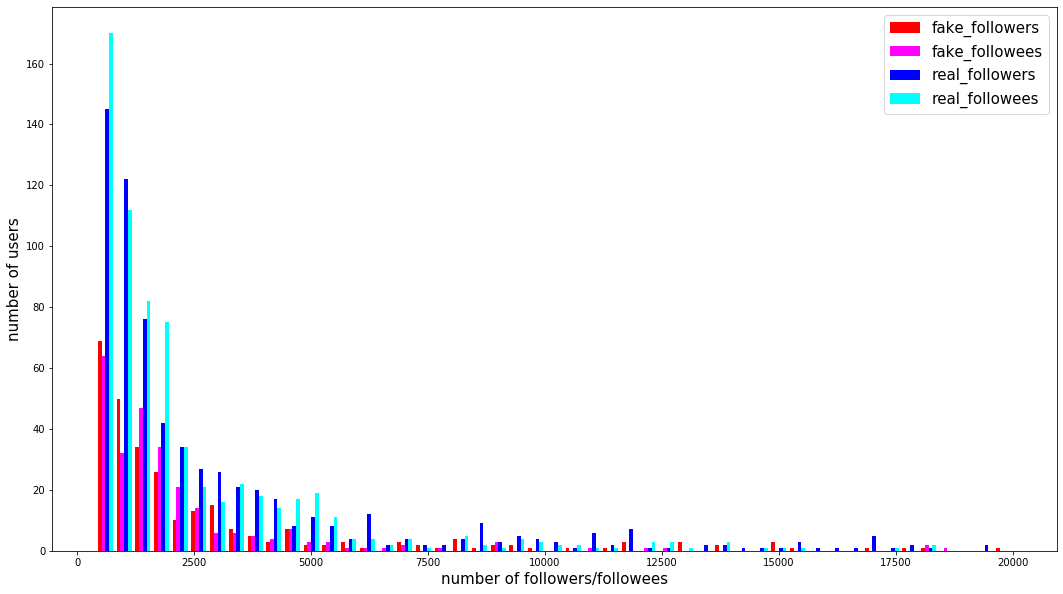

In [10]:
# Draw on the same plot the distribution of follower count for Fake and Real of HealthStory
# dataset. Repeat the process for the distribution of followee count for fake and Real data.

# initialize lists to hold the
# follower and followee counts
fake_followers = []
fake_followees = []
real_followers = []
real_followees = []

# append the follower/followee data to the lists
for i, j in enumerate(user_network_data):
    if list(user_network_data.values())[i].get("status") == "Fake":
        fake_followers.append(list(user_network_data.values())[i].get("user_followers"))
        fake_followees.append(list(user_network_data.values())[i].get("user_followees"))
    else:
        real_followers.append(list(user_network_data.values())[i].get("user_followers"))
        real_followees.append(list(user_network_data.values())[i].get("user_followees"))

# generate the bins
bins=[]
start = 0
for k in range(50):
    h = 400
    value = start+h
    start=value
    bins.append(value)

# plot the follower/followee data
sample_size = "SAMPLE SIZES:\n"
count_fake = "number of fake users: " + str(len(fake_followers))
count_real = "\nnumber of real users: " + str(len(real_followers))
title_string = sample_size + count_fake + count_real
print(title_string)
colors = ["red", "magenta", "blue", "cyan"]
data = [fake_followers, fake_followees, real_followers, real_followees]
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(18)
ax.hist(data, bins=bins, color=colors, label=["fake_followers", "fake_followees", "real_followers", "real_followees"])
ax.legend(prop={'size': 15})
plt.xlabel("number of followers/followees", fontsize=15)
plt.ylabel("number of users", fontsize=15)
plt.show()

#print("Hello World! - to avoid the jupyter bug with comments")

In [13]:
# Show whether power law distribution can be fitted to the above plots

"""
X = fake_followers
Y = fake_followees
Z = real_followers
A = real_followees

for i,j in enumerate(X):
    if j == 0:
        X.pop(i)
for i,j in enumerate(Y):
    if j == 0:
        Y.pop(i)
for i,j in enumerate(Z):
    if j == 0:
        Z.pop(i)
for i,j in enumerate(A):
    if j == 0:
        A.pop(i)

        

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
fig.suptitle('fake_followers', fontsize=16)
powerlaw.plot_pdf(X, ax=ax, color='red', linewidth=2)
fit = powerlaw.Fit(X, xmin=1, discrete=True)
fit.power_law.plot_pdf(ax=ax, linestyle=':', color='g')
fit = powerlaw.Fit(X, discrete=True)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=ax)
fit.lognormal.plot_pdf(color='y', linestyle='--', ax=ax)

fig1 = plt.figure(figsize=(8, 5))
ax1 = fig1.add_subplot(111)
fig1.suptitle('fake_followees', fontsize=16)
powerlaw.plot_pdf(Y, ax=ax1, color='magenta', linewidth=2)
fit = powerlaw.Fit(Y, xmin=1, discrete=True)
fit.power_law.plot_pdf(ax=ax1, linestyle=':', color='g')
fit = powerlaw.Fit(Y, discrete=True)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=ax1)
fit.lognormal.plot_pdf(color='y', linestyle='--', ax=ax1)

fig2 = plt.figure(figsize=(8, 5))
ax2 = fig2.add_subplot(111)
fig2.suptitle('real_followers', fontsize=16)
powerlaw.plot_pdf(Z, ax=ax2, color='blue', linewidth=2)
fit = powerlaw.Fit(Z, xmin=1, discrete=True)
fit.power_law.plot_pdf(ax=ax2, linestyle=':', color='g')
fit = powerlaw.Fit(Z, discrete=True)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=ax2)
fit.lognormal.plot_pdf(color='y', linestyle='--', ax=ax2)

fig3 = plt.figure(figsize=(8, 5))
ax3 = fig3.add_subplot(111)
fig3.suptitle('real_followees', fontsize=16)
powerlaw.plot_pdf(A, ax=ax3, color='cyan', linewidth=2)
fit = powerlaw.Fit(A, xmin=1, discrete=True)
fit.power_law.plot_pdf(ax=ax3, linestyle=':', color='g')
fit = powerlaw.Fit(A, discrete=True)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=ax3)
fit.lognormal.plot_pdf(color='y', linestyle='--', ax=ax3)

plt.show()
"""
print("Hello World! - to avoid the jupyter bug with comments")

Hello World! - to avoid the jupyter bug with comments


In [ ]:
# We want to investigate whether some fake data are genuine or not. study whether the user ids of
# fake news and real news dataset are genuine or not. For this purpose, study the program
# botometer available in https://github.com/IUNetSci/botometer-python. The program inputs a
# tweet user id and outputs the probability that the user id is a bot or human. You can use a
# threshold 0.5 beyond which a program is bot or not. The purpose is therefore to test the
# hypothesis whether Fake News are globally originated from bots or humans and whether Real
# News are generated by humans or also by bots. Draw a plot showing the proportion of bots in Fake
# data and Real data.

"""

# open the files where the data will be written to

#botometer_results_path = '~\\IntroductionToSocialNetworkAnalysis\\botometer_day2_results.json'
#botometer_results1_path = '~\\IntroductionToSocialNetworkAnalysis\\botometer_day2_results1.json'
#final_botometer_results_file = open(botometer_results_path, "w")
#final_botometer_results1_file = open(botometer_results1_path, "w")


# due to the limitation of 500 requests/day
# of botometer, multiple accounts were created
# and the first 500 requests were made on a
# different day
first_500 = {}
second_500 = {}
third_500 = {}
final_users = {}
        
# divide the data in to sets of 500 users
for i, j in enumerate(user_network_data):
    if (len(first_500) < 500):
        first_500[j] = list(user_network_data.values())[i]
        
for i, j in enumerate(user_network_data):
    if (len(second_500) < 500) and (i >= 500):
        second_500[j] = list(user_network_data.values())[i]
        
for i, j in enumerate(user_network_data):
    if (len(third_500) < 500) and (i >= 1000):
        third_500[j] = list(user_network_data.values())[i]

for i, j in enumerate(user_network_data):
    if (i >= 1500):
        final_users[j] = list(user_network_data.values())[i]
        
# rapidapi key is required to use botometer
rapidapi_key = ""

rapidapi_key1 = ""

rapidapi_key2 = ""

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

bom1 = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key1,
                          **twitter_app_auth)

bom2 = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key2,
                          **twitter_app_auth)


# list to add the results
botometer_results = {}

# run the botometer for the users,
# 500 at a time
for i,j in enumerate(first_500):
    try:
        print(i)
        botometer_results[list(first_500.keys())[i]] = bom.check_account(list(first_500.values())[i].get("user_id"))
    # if the tweet has been deleted after
    # the data was gathered
    # NoTimelineError is raised.
    except NoTimelineError:
        print("NoTimelineError occurred")
        continue
    except:
        print("Some other error occurred")
        continue

for i,j in enumerate(second_500):
    try:
        print(i)
        botometer_results[list(second_500.keys())[i]] = bom.check_account(list(second_500.values())[i].get("user_id"))
    except NoTimelineError:
        print("NoTimelineError occurred")
        continue
    except:
        print("Some other error occurred")
        continue
    
for i,j in enumerate(third_500):
    try:
        print(i)
        botometer_results[list(third_500.keys())[i]] = bom1.check_account(list(third_500.values())[i].get("user_id"))
    except NoTimelineError:
        print("NoTimelineError occurred")
        continue
    except:
        print("Some other error occurred")
        continue
    
for i,j in enumerate(final_users):
    try:
        print(i)
        botometer_results[list(final_users.keys())[i]] = bom2.check_account(list(final_users.values())[i].get("user_id"))
    except NoTimelineError:
        print("NoTimelineError occurred")
        continue
    except:
        print("Some other error occurred")
        continue


# append the botometer results together

final_results = {}

for i,j in enumerate(botometer_results_data1):
    final_results[list(botometer_results_data1.keys())[i]] = list(botometer_results_data1.values())[i]
    
for i,j in enumerate(botometer_results_data):
    final_results[list(botometer_results_data.keys())[i]] = list(botometer_results_data.values())[i]
    
# write the gathered data to the files
jsonString = json.dumps(final_results)
jsonString1 = json.dumps(final_results)

final_botometer_results_file.write(jsonString)
final_botometer_results_file1.write(jsonString1)

final_botometer_results_file.close()
final_botometer_results1_file.close()
"""
print("Hello World! - to avoid the jupyter bug with comments")

In [ ]:
# determine if a user is a bot or a human
# depending on the cap from botometer

df = pd.DataFrame()

for i, j in enumerate(final_botometer_results_data):
    
    # eng_cap is the conditional automated propability
    # that the user is a bot
    # uni_cap is the same as eng_cap, but for
    # other languages
    eng_cap = list(final_botometer_results_data.values())[i].get("cap").get("english")
    if eng_cap > 0.5:
        eng_cap_result = "bot"
    else:
        eng_cap_result = "human"
        
    uni_cap = list(final_botometer_results_data.values())[i].get("cap").get("universal")
    if uni_cap > 0.5:
        uni_cap_result = "bot"
    else:
        uni_cap_result = "human"
        
    # try-except is needed, since
    # the \\FakeHealth\\dataset\\content\\HealthStory
    # did not include all news
    try:
        # create dataframe out of the data
        df2 = pd.DataFrame(final_data[j], index=[j])

        # add the gathered values to the dataframe
        df2["eng_cap"] = eng_cap
        df2["eng_cap_result"] = eng_cap_result
        df2["uni_cap"] = uni_cap
        df2["uni_cap_result"] = uni_cap_result
        
        # append the dataframe
        df = df.append(df2)
    except KeyError:
        print("news item was not found, skipping")
        continue

In [ ]:
# write the gathered data to a file
"""
data_path = '~\\IntroductionToSocialNetworkAnalysis\\data.json'
data1_path = '~\\IntroductionToSocialNetworkAnalysis\\data1.json'
data_file = open(data_path, "w")
data1_file = open(data1_path, "w")    

json_df = df.to_json(orient="index")

parsed = json.loads(json_df)

jsonString = json.dumps(parsed)
jsonString1 = json.dumps(parsed)

data_file.write(jsonString)
data1_file.write(jsonString1)

data_file.close()
data1_file.close()
"""
print("Hello World! - to avoid the jupyter bug with comments")

In [ ]:
# plot the data from botometer

fake_bots_eng = 0
fake_humans_eng = 0
real_bots_eng = 0
real_humans_eng = 0

fake_bots_uni = 0
fake_humans_uni = 0
real_bots_uni = 0
real_humans_uni = 0

# count users based on their english and universal cap,
# also differentiate users by their status (real or fake),
for i, j in enumerate(gathered_data):
    if list(gathered_data.values())[i].get("status") == "Fake":
        if list(gathered_data.values())[i].get("eng_cap_result") == "bot":
            fake_bots_eng += 1
        if list(gathered_data.values())[i].get("eng_cap_result") == "human":
            fake_humans_eng += 1
        if list(gathered_data.values())[i].get("uni_cap_result") == "bot":
            fake_bots_uni += 1
        elif list(gathered_data.values())[i].get("uni_cap_result") == "human":
            fake_humans_uni += 1
    elif list(gathered_data.values())[i].get("status") == "Real":
        if list(gathered_data.values())[i].get("eng_cap_result") == "bot":
            real_bots_eng +=1
        if list(gathered_data.values())[i].get("eng_cap_result") == "human":
            real_humans_eng += 1
        if list(gathered_data.values())[i].get("uni_cap_result") == "bot":
            real_bots_uni += 1
        elif list(gathered_data.values())[i].get("uni_cap_result") == "human":
            real_humans_uni += 1


# plot the data
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
status_fake_eng = ['fake_bots_eng', 'fake_humans_eng']
counts_fake_eng = [fake_bots_eng, fake_humans_eng]

status_fake_uni = ['fake_bots_uni', 'fake_humans_uni']
counts_fake_uni = [fake_bots_uni, fake_humans_uni]

status_real_eng = ['real_bots_eng', 'real_humans_eng']
counts_real_eng = [real_bots_eng, real_humans_eng]

status_real_uni = ['real_bots_uni', 'real_humans_uni']
counts_real_uni = [real_bots_uni, real_humans_uni]

ax.bar(status_fake_eng,counts_fake_eng, color="red")
ax.bar(status_fake_uni,counts_fake_uni, color="magenta")
ax.bar(status_real_eng,counts_real_eng, color="blue")
ax.bar(status_real_uni,counts_real_uni, color="cyan")
ax.set_ylabel('Number of users')
ax.set_title('Results')
ax.legend(labels=["Fake_eng", "Fake_uni", "Real_eng", "Real_uni"])
ax.set_xticklabels([("fake_bots_eng",fake_bots_eng), ("fake_humans_eng",fake_humans_eng),
                    ("fake_bots_uni",fake_bots_uni), ("fake_humans_uni",fake_humans_uni),
                    ("real_bots_eng",real_bots_eng), ("real_humans_eng",real_humans_eng),
                    ("real_bots_uni",real_bots_uni), ("real_humans_uni",real_humans_uni)])
plt.show()

In [ ]:
# Use VADER tool (https://github.com/cjhutto/vaderSentiment), which output sentiment in terms
# of POSITIVE, NEGATIVE and NEUTRAL to determine the sentiment of each news in Fake and Real 
# data. Then represent the distribution of each news statement as a point in the ternary plot for 
# both Fake and Real data. Conclude whether sentiment can differentiate the two datasets.

"""
# path to the files containing text of the news
content_path = '~\\FakeHealth\\dataset\\content\\HealthStory\\'

# initialize empty dataframe
df = pd.DataFrame()

# user_network_data contains data from earlier tasks, sample:
#
# {"story_reviews_00000": {"tweet_id": do_not_upload_tweet_ids_to_github, "user_id": do_not_upload_user_ids_to_github,
#  "user_followers": 17079, "user_followees": 18440, "status": "Fake"},
    ...
#  "story_reviews_01699": {"tweet_id": do_not_upload_tweet_ids_to_github, "user_id": do_not_upload_user_ids_to_github,
#    "user_followers": 241, "user_followees": 494, "status": "Real"}}
#

for i, j in enumerate(user_network_data):

    # initialize lists to hold data gathered from Vader tool
    neg, pos, neu, comp = [],[],[], []
    
    analyzer = SentimentIntensityAnalyzer()
    
    # as each news item is in its own respective file
    # path to open the file needs to be created at runtime
    file_id = str(list(user_network_data)[i]) + ".json"
    path = content_path + file_id
    
    # try except to open the file
    try:
        with open(path) as content_file:
            content = json.load(content_file)
    except FileNotFoundError:
        print("file was not found", file_id)
        continue
        
    # fetch the news item from the file
    news_item = content.get("text")

    # run the Vader tool analyzer
    sentiment_dict = analyzer.polarity_scores(news_item)
    
    # add the gathered values to the lists
    neg.append(sentiment_dict["neg"])
    pos.append(sentiment_dict["pos"])
    neu.append(sentiment_dict["neu"])
    comp.append(sentiment_dict["compound"])
    
    # according to Vader tool documentation
    # if compound value is less than -0.05 
    # the sentiment is negative, and if the
    # value is over 0.05, it is positive, 
    # otherwise it is neutral
    
    if (sentiment_dict['compound'] >= 0.05):
        result = "Positive"
    elif (sentiment_dict['compound'] <= 0.05):
        result = "Negative"
    else:
        result = "Neutral"
    
    # create dataframe out of the data
    df2 = pd.DataFrame(user_network_data[j], index=[j])
    
    # add the gathered values to the dataframe
    df2["neg"] = neg
    df2["neu"] = neu
    df2["pos"] = pos
    df2["comp"] = comp
    df2["sentiment"] = result
    
    # append the dataframe
    df = df.append(df2)
    
    # close the opened file
    content_file.close()
"""
print("Hello World! - to avoid the jupyter bug with comments")

In [ ]:
# write the gathered data to a local file

"""

final_data_path = '~\\IntroductionToSocialNetworkAnalysis\\final_data.json'
final_data1_path = '~\\IntroductionToSocialNetworkAnalysis\\final_data1.json'
final_data_file = open(final_data_path, "w")
final_data1_file = open(final_data1_path, "w")    


jsonString = json.dumps(user_network_data)
jsonString1 = json.dumps(user_network_data)

final_data_file.write(jsonString)
final_data1_file.write(jsonString1)

final_data_file.close()
final_data1_file.close()
"""
print("Hello World! - to avoid the jupyter bug with comments")

In [ ]:
# plot the Vader data to ternary plot

df = pd.DataFrame()


for i,j in enumerate(final_data):
    df2 = pd.DataFrame(final_data[j], index=[j])
    df = df.append(df2)

#print(df)

fig = px.scatter_ternary(df, a="neu", b="pos", c="neg", 
                         color="status",
                         hover_name=df.index, size_max=15,
                         labels={"neu": "Neutral",
                                 "pos": "Positive",
                                 "neg": "Negative"},
                         color_discrete_map = {"Real": "#00203F", 
                                               "Fake": "#E34646"},
                         template="ggplot2",
                         title="Polarity scores of news")
fig.update_layout(
    font_family="Courier New",
    font_color="#545454",
    title_font_family="Courier",
    title_font_color="#344050",
    legend_title="Status",
    legend_title_font_color="#545454",
    legend_title_font_size=18,
    title_font_size=24
)
fig.show()